##### Se cargan las librerías

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import ShuffleSplit




#### Se carga un dataset de scikit learn

In [ ]:
ds = datasets.load_diabetes()
print(datasets.load_diabetes())

##### Se mezclan los datos y se los divide en datos de entrenamiento y datos de validacion

In [ ]:
print len(ds.data)
print ds.data.shape
print len(ds.target)
print ds.target.shape

In [35]:
def cargar_datos_prueba():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    print "X: ",len(X),"x.shape: ",X.shape
    print "y: ",len(y),"y.shape: ",y.shape
    # Se genera una division aleatoria entre datos de prueba y entrenamiento
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.20, random_state=42)
    
    return (X,y,X_train,y_train,X_test, y_test)


In [36]:
X,y,X_train,y_train,X_test, y_test = cargar_datos_prueba()

X:  150 x.shape:  (150, 4)
y:  150 y.shape:  (150,)


In [ ]:
X_train

#### Metodo para graficar los elementos del modelo

In [4]:
def graficar(nombre_kernel,clf):
    plt.clf()
    plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
    plt.axis('tight')
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])
    plt.title("Kernel "+nombre_kernel)
    plt.show()

    

In [5]:
def plot_matrix(clf, X_test, y_test):
    plt.clf()
    plt.imshow(confusion_matrix(clf.predict(X_test), y_test),
               interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    plt.show()
    
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    #return plt


#### Se entrena el modelo y se retornan las predicciones para un conjunto de datos

In [61]:
def entrenar_kernel(nombre_kernel):

    clf = svm.SVC(kernel=nombre_kernel, probability=True)#, gamma=10)
    clf.fit(X_train, y_train.ravel())
    y_pred = clf.predict(X_test)
    return (clf,y_pred)


despues borrar abajo

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        15
          1       1.00      1.00      1.00        11
          2       1.00      1.00      1.00        12

avg / total       1.00      1.00      1.00        38

1.0


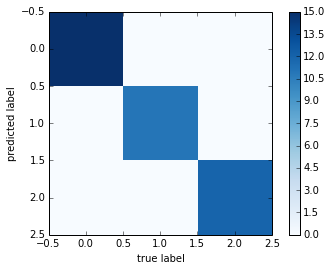

In [54]:
from sklearn.svm import SVC

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.25, random_state=42)
    
    
sv = SVC(kernel='poly', cache_size=1000)
sv.fit(X_train, y_train.ravel())

print classification_report(sv.predict(X_test), y_test)
print sv.score(X_test, y_test)
plot_matrix(sv, X_test, y_test)

##### Para las diferencias hacer: 
##### 1. classication_report(), con valores como recall, y precision, f1-score.
##### 2. score(precision).
##### 3. Matriz de confusion.
##### de los datos de prueba contra los datos de validacion.

In [7]:
def imprimir_estadisticas(nombre_kernel,mykernel,X_test,y_pred,y_test):
    print ""
    print "Kernel testeado: ",nombre_kernel
    print classification_report(y_pred, y_test)
    print "La matriz de confusion obtenida es la siguiente:"
    print confusion_matrix(y_pred, y_test)
    print ""
    print "Precision media del kernel: ",mykernel.score(X_test, y_test)
    print ""
    print ""
    
    
    

##### Se entrenan y compara el rendimiento de los kernels con los datos de prueba

In [ ]:
ShuffleSplit?


In [50]:
kernel2,y_pred2 = entrenar_kernel('poly')
imprimir_estadisticas('poly',kernel2,X_test,y_pred2,y_test)
plot_matrix(kernel2, X_test, y_test)
graficar('poly',kernel2)

#Se grafica la curva de aprendizaje para detectar overfitting
title = "Learning Curves (SVM, Polynomial kernel, $\gamma=10$)"

# SVC is more expensive so we do a lower number of CV iterations:

cv2 = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#estimator2 = kernel2
#plot_learning_curve(estimator2, title, X, y, (0.2, 1.01), cv=cv2, n_jobs=4)



ValueError: bad input shape (120, 2)


Kernel testeado:  rbf
             precision    recall  f1-score   support

          1       0.58      0.78      0.67         9
          2       0.75      0.55      0.63        11

avg / total       0.68      0.65      0.65        20

La matriz de confusion obtenida es la siguiente:
[[7 2]
 [5 6]]

Precision media del kernel:  0.65




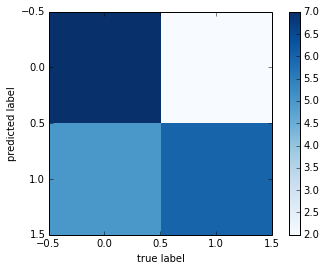

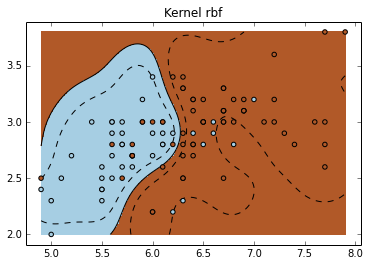

In [9]:
kernel,y_pred = entrenar_kernel('rbf')
imprimir_estadisticas('rbf',kernel,X_test,y_pred,y_test)
plot_matrix(kernel, X_test, y_test)
graficar('rbf',kernel)

#Sacado de  -->
#http://scikit-learn.org/0.15/auto_examples/plot_learning_curve.html
#Se grafica la curva de aprendizaje para detectar overfitting
title = "Learning Curves (SVM, RBF kernel, $\gamma=10$)"

# SVC is more expensive so we do a lower number of CV iterations:

cv = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
#estimator = kernel
#plot_learning_curve(estimator, title, X, y, (0.2, 1.01), cv=cv, n_jobs=4)



### Punto 1.5) Cuantificación de la calidad de las predicciones  

##### Funciones previas 

In [10]:
#Area under the curve(ROC)
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

#Accuracy
from sklearn.metrics import accuracy_score

#Log_loss
from sklearn.metrics import log_loss
from sklearn.svm.libsvm import predict_proba

In [45]:

#Probar con test_size 20 - 25%.
def cargar_datos_prueba_binarios():
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
    # Se recorren todos los valores de datos(data) y labels (targets) y se 
    # elimina cualquier valor que sea igual a cero.
    #X = X[y != 0, :2]
    #y = y[y != 0]
    y = label_binarize(y,classes=[0,1])
    # Se genera una division aleatoria entre datos de prueba y entrenamiento
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.20, random_state=42)
    
    return (X,y,X_train,y_train,X_test, y_test)



#### Accuracy

In [11]:
#Kernel Polinomial
print "El accuracy score para el kernel polinomial es: ",accuracy_score(y_test,kernel2.predict(X_test))


El accuracy score para el kernel polinomial es:  0.55


In [12]:
#Kernel RBF
print "El accuracy score para el kernel RBF es: ",accuracy_score(y_test,kernel.predict(X_test))


El accuracy score para el kernel RBF es:  0.65


#### ROC (Area under the curve) 

In [46]:
#Kernel polynomial
#Se saca el y_score de la funcion de decision del clasificador
X,y,X_train, y_train, X_test,y_test = cargar_datos_prueba_binarios()
kernelPoly = entrenar_kernel('poly')[0]

y_scores = kernelPoly.decision_function(X_test)
# Learn to predict each class against the other
#random_state = np.random.RandomState(0)

print "El area bajo la curva para el kernel polinomial en SVM es: ", roc_auc_score(y_test, y_scores)*100, "%"


ValueError: bad input shape (120, 2)

In [18]:
#Kernel RBF
X,y,X_train, y_train, X_test,y_test = cargar_datos_prueba_binarios()
kernelRBF = entrenar_kernel('rbf')[0]

y_scores = kernelRBF.decision_function(X_test)

print "El area bajo la curva para el kernel RBF en SVM es: ", roc_auc_score(y_test, y_scores)*100, "%"

El area bajo la curva para el kernel RBF en SVM es:  61.4583333333 %


/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


In [55]:
from sklearn.decomposition import RandomizedPCA # using randomized Singular Value Decomposition 
Xp = RandomizedPCA(n_components=2, random_state=1).fit_transform(X_train)
Xp



array([[-2.77073129,  0.37596194],
       [-2.68620079,  0.86021537],
       [ 1.36848497, -0.55498535],
       [ 0.76579446,  0.21615618],
       [ 1.17675347,  0.43928018],
       [-2.66326619,  0.85705567],
       [-2.54815144,  0.69605557],
       [-0.24034946, -0.6381722 ],
       [ 1.39824234, -0.11364764],
       [ 1.86225902,  0.06986807],
       [ 0.85502707,  0.36342405],
       [ 2.87845621,  0.79010714],
       [ 0.33048563, -0.26202658],
       [ 3.35385608,  0.57230062],
       [ 0.61583234, -0.32837081],
       [-2.72712403,  0.37047208],
       [ 3.45502072,  0.48631071],
       [ 0.18849797, -0.29396258],
       [-2.68351676,  0.36498222],
       [-2.81322831,  0.31252869],
       [-2.24915723,  0.47897759],
       [-0.56221755, -1.2228624 ],
       [ 1.34149259, -0.17779427],
       [-2.39881674,  0.01017417],
       [-2.55394689, -0.09139832],
       [-2.34733523,  0.14545792],
       [ 0.30946889, -0.47243667],
       [-2.63379218,  0.28072525],
       [ 0.28718098,

In [56]:
y_train.ravel()

array([0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1,
       1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2,
       2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1,
       2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

[0 1 2]


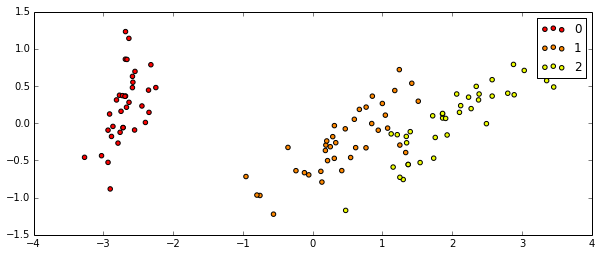

In [57]:
% matplotlib inline
import matplotlib.pyplot as plt

# get the product class 
product_class = np.unique(y_train.ravel())
print product_class
colors = plt.get_cmap("hsv")

plt.figure(figsize=(10, 4))
for i, p in enumerate(product_class):
    mask = (y_train == p)
    plt.scatter(Xp[mask, 0], Xp[mask, 1], 
                c=colors(1. * i / 11), label=p)
    
plt.legend(loc="best")

#### Log loss 

In [62]:
#Kernel polinomial

kernelPoly2 = entrenar_kernel('poly')[0]
print "El valor de logartmic loss es: ", log_loss(y_test.ravel(),kernelPoly2.predict_proba(X_test))


El valor de logartmic loss es:  0.0701711117891


In [24]:
log_loss?

In [21]:
kernelPoly2.predict_proba(X_test)

array([[ 0.46114161,  0.53885839],
       [ 0.47726694,  0.52273306],
       [ 0.67129056,  0.32870944],
       [ 0.33900428,  0.66099572],
       [ 0.31158322,  0.68841678],
       [ 0.27629078,  0.72370922],
       [ 0.44297104,  0.55702896],
       [ 0.80082259,  0.19917741],
       [ 0.19124586,  0.80875414],
       [ 0.69881686,  0.30118314],
       [ 0.48473266,  0.51526734],
       [ 0.26709921,  0.73290079],
       [ 0.44797354,  0.55202646],
       [ 0.38149029,  0.61850971],
       [ 0.60741502,  0.39258498],
       [ 0.50950363,  0.49049637],
       [ 0.43884982,  0.56115018],
       [ 0.44416221,  0.55583779],
       [ 0.39615904,  0.60384096],
       [ 0.26709921,  0.73290079]])

In [22]:
#Kernel rbf
kernelRBF2 = entrenar_kernel('rbf')[0]
print "El valor de logartmic loss es: ", log_loss(y_test,kernelRBF2.predict_proba(X_test))


El valor de logartmic loss es:  0.68599538119


/usr/local/lib/python2.7/dist-packages/sklearn/svm/base.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y_ = column_or_1d(y, warn=True)


##### F1-Score y precision hechos arriba 